In [1]:
%matplotlib inline

In [2]:
import json
import random

import numpy as np
import pandas as pd
import networkx as nx

In [50]:
flights = pd.read_csv('2018_T100_Segment_All.csv')

In [51]:
southwest_df1 = flights.loc[flights['UNIQUE_CARRIER_NAME']=='Southwest Airlines Co.']

In [52]:
souythwest_node_df = southwest_df1[['ORIGIN_AIRPORT_ID', 'ORIGIN', 'DEST_AIRPORT_ID', 'DEST']]

In [31]:
G = nx.Graph()

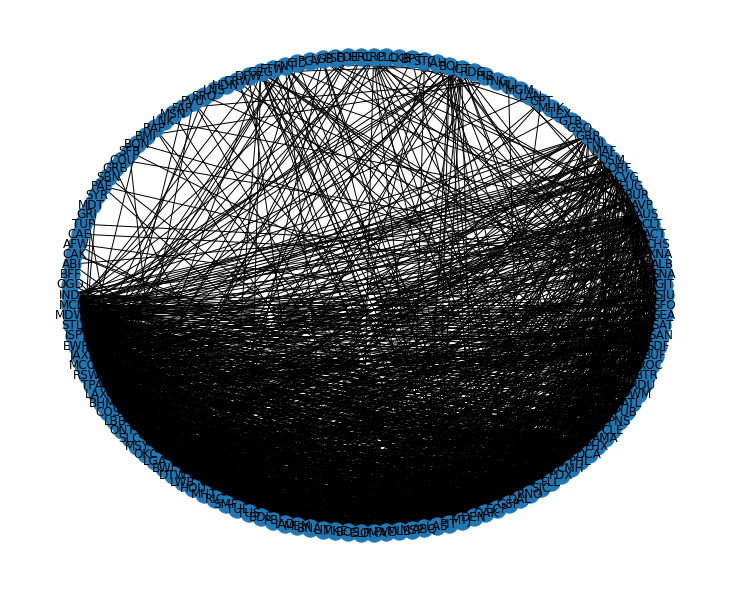

In [53]:
G = nx.from_pandas_edgelist(souythwest_node_df, 'ORIGIN', 'DEST')
from matplotlib.pyplot import figure
figure(figsize=(10, 8))
nx.draw_shell(G, with_labels=True)

In [54]:
num_connections = {}
for x in G.nodes:
    num_connections[x] = len(G[x])
s = pd.Series(num_connections, name='connections')
df2 = s.to_frame().sort_values('connections', ascending=False)
df2.head()

,connections
DAL,82
DEN,82
MCO,80
MDW,80
BWI,75


In [55]:
nx.write_graphml(G, "southwest_nodes.graphml")

In [40]:
delta_flights = pd.read_csv('delta.csv')
delta_flights

,UNIQUE_CARRIER,UNIQUE_CARRIER_NAME,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST,MONTH
0,DL,Delta Air Lines Inc.,10140,ABQ,10397,ATL,1
1,DL,Delta Air Lines Inc.,10140,ABQ,10397,ATL,2
2,DL,Delta Air Lines Inc.,10140,ABQ,10397,ATL,3
3,DL,Delta Air Lines Inc.,10140,ABQ,10397,ATL,4
4,DL,Delta Air Lines Inc.,10140,ABQ,10397,ATL,5
...,...,...,...,...,...,...,...
12168,DL,Delta Air Lines Inc.,15919,XNA,10868,CAE,9
12169,DL,Delta Air Lines Inc.,15919,XNA,11292,DEN,8
12170,DL,Delta Air Lines Inc.,15919,XNA,15153,TCL,10
12171,DL,Delta Air Lines Inc.,15919,XNA,15412,TYS,1


In [56]:
delta_df2 = flights.loc[flights['UNIQUE_CARRIER_NAME']=='Delta Air Lines Inc.']

In [57]:
delta_node_df = delta_df2[['ORIGIN_AIRPORT_ID', 'ORIGIN', 'DEST_AIRPORT_ID', 'DEST']]

In [42]:
f = nx.Graph()

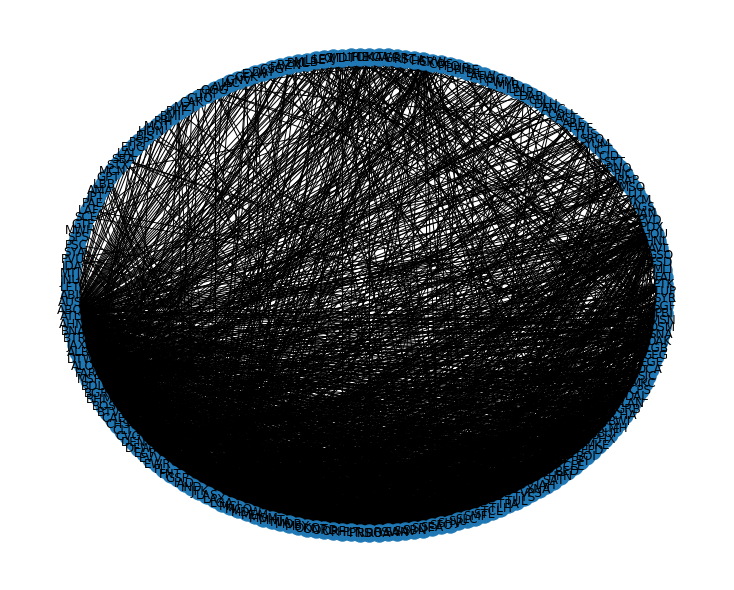

In [58]:
f = nx.from_pandas_edgelist(delta_node_df, 'ORIGIN', 'DEST')
from matplotlib.pyplot import figure
figure(figsize=(10, 8))
nx.draw_shell(f, with_labels=True)

In [59]:
delta_connections = {}
for x in f.nodes:
 delta_connections[x] = len(f[x])
t = pd.Series(delta_connections, name='connections')
connection_num_df = t.to_frame().sort_values('connections', ascending=False)
connection_num_df.head()

,connections
ATL,167
MSP,122
DTW,114
SLC,94
LAX,90


In [60]:
nx.write_graphml(f, "delta_flight.graphml")

In [61]:
american_df2 = flights.loc[flights['UNIQUE_CARRIER_NAME']=='American Airlines Inc.']

In [62]:
american_node_df = american_df2[['ORIGIN_AIRPORT_ID', 'ORIGIN', 'DEST_AIRPORT_ID', 'DEST']]

In [63]:
k = nx.Graph()

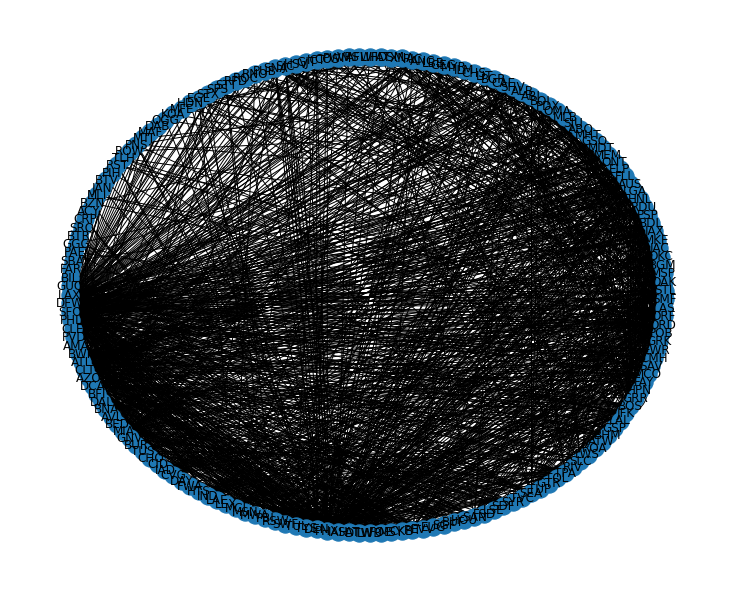

In [66]:
k = nx.from_pandas_edgelist(american_node_df, 'ORIGIN', 'DEST')
from matplotlib.pyplot import figure
figure(figsize=(10, 8))
nx.draw_shell(k, with_labels=True)

In [67]:
american_connections = {}
for x in k.nodes:
 delta_connections[x] = len(k[x])
t = pd.Series(delta_connections, name='connections')
connection_num_df = t.to_frame().sort_values('connections', ascending=False)
connection_num_df.head()

,connections
DFW,123
CLT,90
ORD,89
PHX,86
PHL,73


In [69]:
nx.write_graphml(k, "american_flight.graphml")